In [1]:
#Plant Disease Detection

In [2]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torchvision


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,random_split,TensorDataset
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models

In [5]:
# Set the path to the directory containing the dataset
dataset_path = "/home/laasya-7/Downloads/org/Diseases"

os.listdir(dataset_path)


['train', 'valid']

In [6]:
os.listdir(dataset_path+'/train')

['Grape___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Strawberry___Leaf_scorch',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Raspberry___healthy',
 'Tomato___Bacterial_spot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Potato___Late_blight',
 'Pepper,_bell___healthy',
 'Strawberry___healthy',
 'Potato___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Late_blight',
 'Tomato___Target_Spot',
 'Squash___Powdery_mildew',
 'Grape___Esca_(Black_Measles)',
 'Apple___Apple_scab',
 'Peach___Bacterial_spot',
 'Apple___Cedar_apple_rust',
 'Apple___Black_rot',
 'Cherry_(including_sour)___Powdery_mildew',
 'Grape___Black_rot',
 'Peach___healthy',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___healthy',
 'Potato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Leaf_Mold',
 'Corn_(maize)___Common_rust_',
 'Soybean___healthy',
 'Tomato___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Apple___healthy',
 'Corn_(maize)__

In [7]:
unique_plants = []
cl = os.listdir(dataset_path+'/train')
for i in cl:
    x = i.split('_')
    if x[0] not in unique_plants:
        unique_plants.append(x[0])
print("Number of Unique Plants: ",len(unique_plants))
print("Unique Plants: ",unique_plants)

Number of Unique Plants:  14
Unique Plants:  ['Grape', 'Pepper,', 'Strawberry', 'Orange', 'Raspberry', 'Tomato', 'Corn', 'Potato', 'Squash', 'Apple', 'Peach', 'Cherry', 'Soybean', 'Blueberry']


In [8]:
transform = transforms.Compose([transforms.Resize(size = 128),transforms.ToTensor()])

In [9]:
dataset = ImageFolder(dataset_path+'/train',transform=transform)
test_ds = ImageFolder(dataset_path+'/valid',transform=transform)
print("Number of training images: ",len(dataset))
print("Number of testing images: ",len(test_ds))

Number of training images:  70295
Number of testing images:  17572


In [10]:
num_classes = dataset.classes
print("Number of classes: ",len(num_classes))
print(num_classes)

Number of classes:  38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mit

In [11]:
#Visualising a single image
image, label  = dataset[0]
print("Image shape:",image.shape)
print("Image Label: ",label)
print("Image Label: ",dataset.classes[label])
print(image)

Image shape: torch.Size([3, 128, 128])
Image Label:  0
Image Label:  Apple___Apple_scab
tensor([[[0.6588, 0.6549, 0.6510,  ..., 0.7373, 0.7333, 0.7176],
         [0.6627, 0.6588, 0.6510,  ..., 0.7373, 0.7373, 0.7294],
         [0.6667, 0.6667, 0.6667,  ..., 0.7333, 0.7294, 0.7294],
         ...,
         [0.4118, 0.4039, 0.3961,  ..., 0.4863, 0.4902, 0.4902],
         [0.4000, 0.4078, 0.4000,  ..., 0.4941, 0.4980, 0.4980],
         [0.4000, 0.4039, 0.4000,  ..., 0.4706, 0.4784, 0.4824]],

        [[0.6431, 0.6392, 0.6353,  ..., 0.7255, 0.7216, 0.7059],
         [0.6471, 0.6431, 0.6353,  ..., 0.7255, 0.7255, 0.7176],
         [0.6510, 0.6510, 0.6510,  ..., 0.7216, 0.7176, 0.7176],
         ...,
         [0.3725, 0.3647, 0.3569,  ..., 0.4235, 0.4275, 0.4275],
         [0.3608, 0.3686, 0.3608,  ..., 0.4314, 0.4353, 0.4353],
         [0.3608, 0.3647, 0.3608,  ..., 0.4078, 0.4157, 0.4196]],

        [[0.7725, 0.7686, 0.7647,  ..., 0.8392, 0.8353, 0.8196],
         [0.7765, 0.7725, 0.7647,  

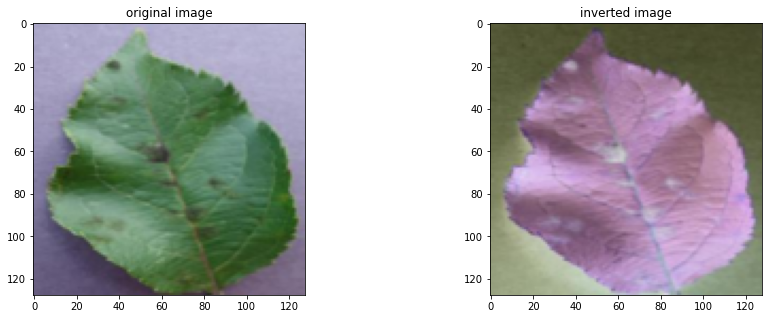

In [12]:
image, label  = dataset[0]
fig,(ax1,ax2) = plt.subplots(figsize=(15,5),nrows=1,ncols=2)
ax1.imshow(image.permute(1,2,0))
ax1.set_title("original image")
ax2.imshow(1-image.permute(1,2,0))
ax2.set_title("inverted image")
plt.show()

In [13]:
random_seed = 42
torch.manual_seed(random_seed)

In [14]:
validation_split = 0.3
val_size = int(len(dataset) * validation_split)
train_size = len(dataset) - val_size

train_ds,val_ds = random_split(dataset,[train_size,val_size])

In [15]:
batch_size = 64

train_loader = DataLoader(train_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)
val_loader = DataLoader(val_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)
test_loader = DataLoader(test_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)

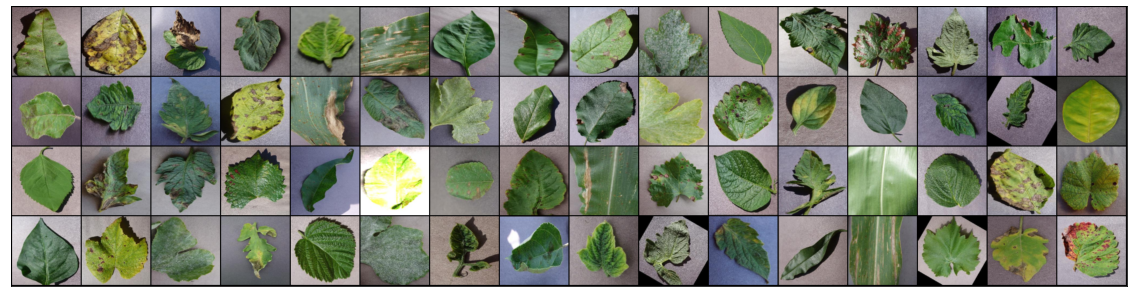

In [16]:
#Visualising a Batch of images
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

In [ ]:
# Set the path to the directory where you want to save the processed images
output_path = "/home/laasya-7/Downloads/op1"

#Image enhancement function
def enhance_image(image):
    # Adjusting brightness and contrast using OpenCV
    enhanced_image = cv2.convertScaleAbs(image, alpha=1.5, beta=10)
    return enhanced_image

#Image restoration function
def restore_image(image):
    # Denoising using OpenCV's fastNlMeansDenoising function
    restored_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    return restored_image

#Color image processing function
def process_image(image):
    # Converting the image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Enhancing the contrast of the L channel using histogram equalization
    lab_image[:, :, 0] = cv2.equalizeHist(lab_image[:, :, 0])

    # Applying CLAHE (Contrast Limited Adaptive Histogram Equalization) to the L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    lab_image[:, :, 0] = clahe.apply(lab_image[:, :, 0])

    # Converting the image back to the original color space
    processed_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2BGR)

    return processed_image

#Image Compression function
def compress_image(image, output_file, jpeg_quality=90):
    # Compressing the image using JPEG compression with the specified quality level
    cv2.imwrite(output_file, image, [int(cv2.IMWRITE_JPEG_QUALITY), jpeg_quality])

#Image segmentation function
def segment_image(image):
    #Using OpenCV's GrabCut algorithm
    mask = np.zeros(image.shape[:2], np.uint8)
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)
    rect = (10, 10, image.shape[1]-20, image.shape[0]-20)
    cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
    mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    segmented_image = image * mask[:, :, np.newaxis]
    return segmented_image

# Iterating through the dataset directory and its subdirectories
for root, dirs, files in os.walk(dataset_path):
    for file in files:
            # Loading the image
            image_path = os.path.join(root, file)
            image = cv2.imread(image_path)

            # Performing image enhancement
            enhanced_image = enhance_image(image)

            # Performing image restoration
            restored_image = restore_image(enhanced_image)
            
            # Performing color image processing
            processed_image = process_image(restored_image)
            
            # Performing image segmentation
            segmented_image = segment_image(processed_image)

            # Creating the corresponding output directory structure
            output_subdir = os.path.relpath(root, dataset_path)
            output_dir = os.path.join(output_path, output_subdir)
            os.makedirs(output_dir, exist_ok=True)

            # Saving the processed image
            output_file = os.path.join(output_dir, file)
            compress_image(segmented_image, output_file)

print("Image processing completed.")